In [26]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode
from sklearn.neighbors import KNeighborsClassifier

mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]
mean2 = [0, 2]
cov2 = [[1, 0], [0, 1]]
n = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

n =  100 bias =  0.03 variance =  0.13099999999999995
n =  200 bias =  0.05 variance =  0.13399999999999992
n =  300 bias =  0.08 variance =  0.162
n =  400 bias =  0.09 variance =  0.17099999999999999
n =  500 bias =  0.05 variance =  0.14099999999999996
n =  600 bias =  0.08 variance =  0.159
n =  700 bias =  0.1 variance =  0.14599999999999994
n =  800 bias =  0.05 variance =  0.13099999999999992
n =  900 bias =  0.04 variance =  0.13899999999999996
n =  1000 bias =  0.08 variance =  0.15200000000000002


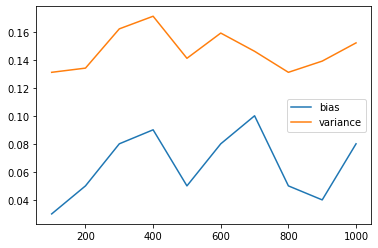

In [27]:
model = KNeighborsClassifier(n_neighbors=1)

x_test = np.zeros(shape=(100,2))

def gauss_density( mean, cov_matrix, variable):
        cov_det = np.linalg.det(cov_matrix)
        cov_inv = np.linalg.inv(cov_matrix)
        x_m = variable - mean
        return np.exp(-0.5 * np.dot(np.dot(x_m.T, cov_inv), x_m)) / np.sqrt((2 * np.pi) ** len(mean) * cov_det)

def loss(y1, y2):
        if y1 == y2:
            return 0
        else:
            return 1

final_bias = []
final_var = []

for num in n:
    train_set = []
    x_train = []
    y_train = []

    for i in range(10):
        c1 = np.random.multivariate_normal(mean1, cov1, int(num/2)).T
        c2 = np.random.multivariate_normal(mean2, cov2, int(num/2)).T
        train_set.append(np.concatenate((c1, c2), axis=1))

    test_set = np.concatenate((np.random.multivariate_normal(mean1, cov1, 50).T, np.random.multivariate_normal(mean2, cov2, 50).T), axis=1)

    for i in range(10):
        x_train.append(np.zeros(shape=(num,2)))
        y_train.append(np.concatenate((np.zeros(int(num/2)), np.ones(int(num/2)))))

    for i in range(10):
        for j in range(num):
            x_train[i][j] = [train_set[i][0][j], train_set[i][1][j]]

    for i in range(100):
        x_test[i] = [test_set[0][i], test_set[1][i]]
    
    preds = []
    for i in range(10):
        model.fit(x_train[i], y_train[i])
        preds.append(model.predict(x_test))

    ym_list = []
    for i in range(100):
        ym_list.append(mode([preds[0][i], preds[1][i], preds[2][i], preds[3][i], preds[4][i], preds[5][i], preds[6][i], preds[7][i], preds[8][i], preds[9][i]]))

    ys_list = []
    for i in range(100):
        if gauss_density(mean1, cov1, x_test[i]) > gauss_density(mean2, cov2, x_test[i]):
            ys_list.append(0)
        else:
            ys_list.append(1)

    bias_list = []

    for i in range(100):
        bias_list.append(loss(ym_list[i], ys_list[i]))

    bias = sum(bias_list)/100
    final_bias.append(bias)

    variance_list = []
    
    for i in range(100):
        variance_list.append(sum(loss(preds[j][i], ym_list[i]) for j in range(10))/10)

    variance = sum(variance_list)/100
    final_var.append(variance)

for i in range(10):
    print("n = ", (i+1)*100, "bias = ", final_bias[i], "variance = ", final_var[i])

plt.plot(n, final_bias, label='bias')
plt.plot(n, final_var, label='variance')
plt.legend()
plt.show()